In [34]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import re

# 1. Load your JSON file
with open("scraped_data/president_news.json", "r", encoding="utf-8") as f:
    pr_data = json.load(f)

with open("scraped_data/news_mn.json", "r", encoding="utf-8") as f:
    nw_data = json.load(f)

# 2. Combine all text into one big string
nw_text = []
for news in nw_data:
    nw_text.extend(news['data'])

pr_text = []
for key, value in pr_data.items():
    pr_text.extend(value.get("text", []))  # safe get

joined_text = " ".join(pr_text)
# pr_cleaned_text = joined_text.replace('\u202f', ' ').replace('\u00a0', ' ')
pr_cleaned_text = joined_text.replace('\u00a0', ' ')

# 3. Count characters
pr_counter = Counter(pr_cleaned_text)

joined_text = " ".join(nw_text)
# nw_cleaned_text = joined_text.replace('\u202f', ' ').replace('\u00a0', ' ')
nw_cleaned_text = joined_text.replace('\u00a0', ' ')

# 3. Count characters
nw_counter = Counter(nw_cleaned_text)

In [35]:
vocab = ["<blank>", "<pad>", " "] + [chr(v) for v in (
    # list(range(0x1800, 0x180F)) +
    # list(range(0x1810, 0x181A)) +
    list(range(0x1820, 0x1879)) +
    list(range(0x1880, 0x18AB)) +
    [0x202F]
)]

# Count how many registered chars are in vocab
pr_vocab = [c for c in pr_counter if c in vocab]
nw_vocab = [c for c in nw_counter if c in vocab]

print(f"Number of characters from char_counter that are in vocab: news: {len(nw_vocab)} - pred: {len(pr_vocab)}")

Number of characters from char_counter that are in vocab: news: 37 - pred: 38


In [36]:
allowed_chars = set(pr_vocab)

# Filter words
pr_filtered_words = [
    word for word in pr_cleaned_text.split(' ')
    if all(char in allowed_chars for char in word)
]
nw_filtered_words = [
    word for word in nw_cleaned_text.split(' ')
    if all(char in allowed_chars for char in word)
]

# Join back into text
pr_final_text = ' '.join(pr_filtered_words)
nw_final_text = ' '.join(nw_filtered_words)

In [37]:
print(f"Number of words pred: {len(pr_final_text.split())}")
print(f"Number of words pred: {len(nw_final_text.split())}")

Number of words pred: 423016
Number of words pred: 203312


In [38]:
pr_unique_words = set(pr_final_text.split())
print(f"Number of unique words pred: {len(pr_unique_words)}")
nw_unique_words = set(nw_final_text.split())
print(f"Number of unique words news: {len(nw_unique_words)}")
combined_unique_words = pr_unique_words | nw_unique_words
print(f"Total unique words combined: {len(combined_unique_words)}")

Number of unique words pred: 13042
Number of unique words news: 11427
Total unique words combined: 19141


In [39]:
# Save pr_final_text
with open('scraped_data/president.txt', 'w', encoding='utf-8') as f:
    f.write(pr_final_text)

# Save nw_final_text
with open('scraped_data/newsmn.txt', 'w', encoding='utf-8') as f:
    f.write(nw_final_text)

C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6176 (\N{MONGOLIAN LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6178 (\N{MONGOLIAN LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6177 (\N{MONGOLIAN LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6180 (\N{MONGOLIAN LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6189 (\N{MONGOLIAN LETTER GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6184 (\N{MONGOLIAN LETTER NA}) missing from font(s) DejaVu Sans.

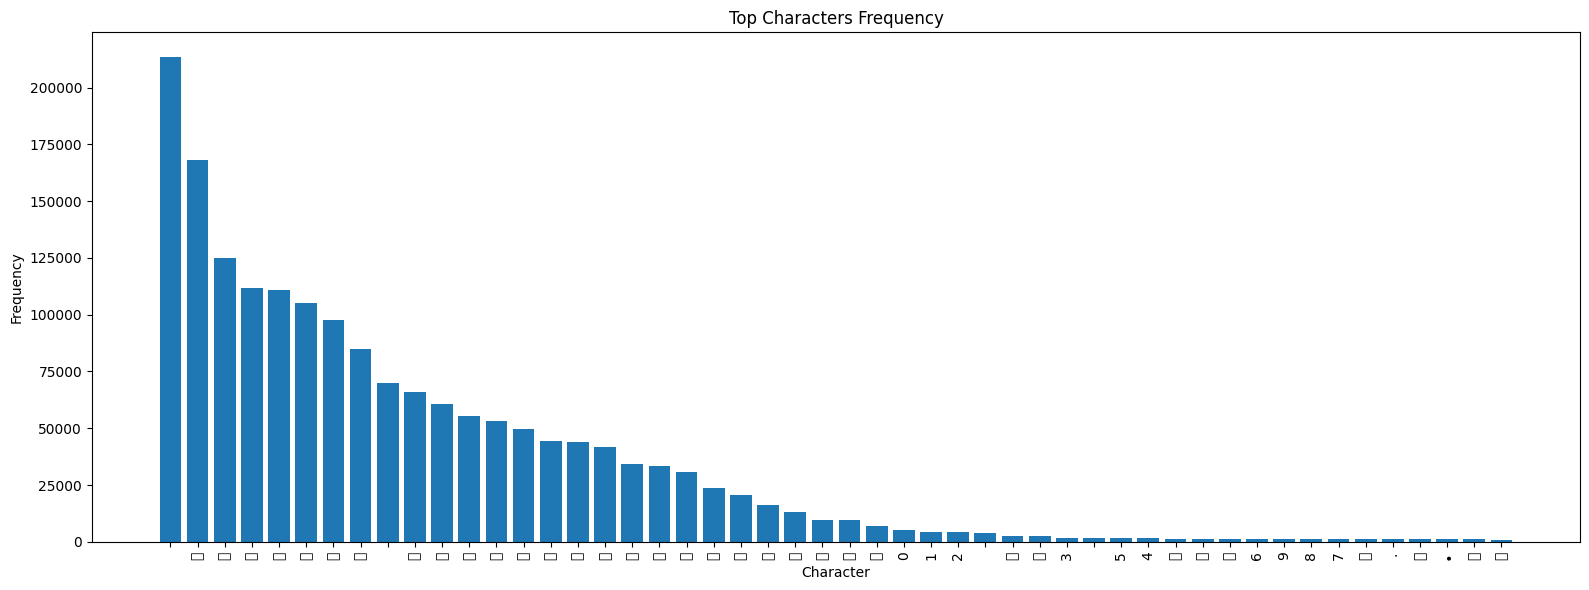

C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6180 (\N{MONGOLIAN LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6184 (\N{MONGOLIAN LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6198 (\N{MONGOLIAN LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6178 (\N{MONGOLIAN LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6195 (\N{MONGOLIAN LETTER DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\home\AppData\Local\Temp\ipykernel_16480\245328662.py:35: UserWarning: Glyph 6182 (\N{MONGOLIAN LETTER UE}) missing from font(s) DejaVu San

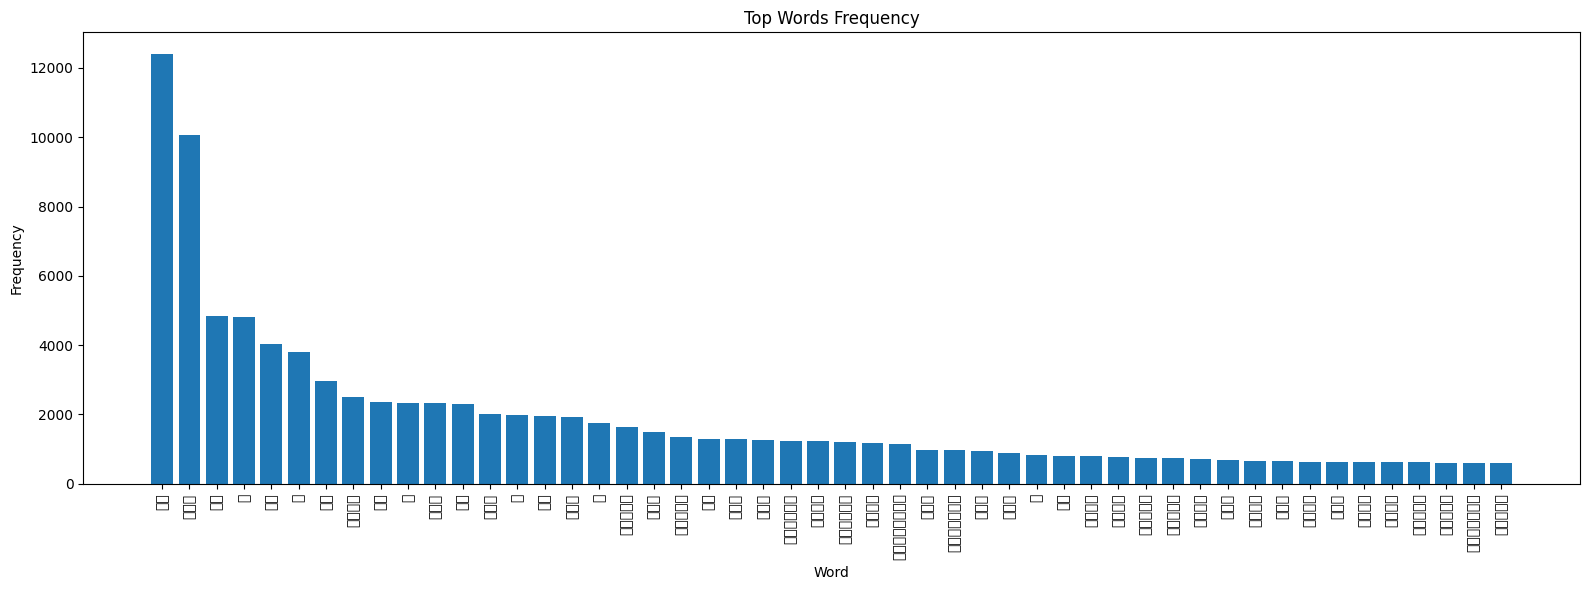

In [6]:

# 1. Load your JSON file
with open("scraped_data/news_mn.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 2. Combine all text into one big string
all_text = []
for news in data:
    all_text.extend(news['data'])

# all_text = []
# for key, value in data.items():
#     all_text.extend(value.get("text", []))  # safe get


joined_text = " ".join(all_text)

# 3. Count characters
char_counter = Counter(joined_text)

# 4. Count words – we split on whitespace
words = re.findall(r"\S+", joined_text)
word_counter = Counter(words)

# 5. Plot character frequencies
def plot_counter(counter, title, xlabel, ylabel, top_n=50):
    most_common = counter.most_common(top_n)
    items, counts = zip(*most_common)

    plt.figure(figsize=(16, 6))
    plt.bar(range(len(items)), counts, tick_label=[f'{i}' for i in items])
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_counter(char_counter, "Top Characters Frequency", "Character", "Frequency")
plot_counter(word_counter, "Top Words Frequency", "Word", "Frequency")


In [ ]:
not_in_vocab = [c for c in char_counter if c not in vocab]

# Optional: Show unique ones
unique_not_in_vocab = set(not_in_vocab)

print(f"Number of characters NOT in vocab: {len(not_in_vocab)}")
print(f"Unique characters NOT in vocab ({len(unique_not_in_vocab)}):")
print(unique_not_in_vocab)